In [1]:
import os
import time
import string

import numpy as np
import pandas as pd
import polars as pl

from datetime import datetime, timedelta
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

from tqdm import tqdm

# Font
from matplotlib import font_manager
font_path = "/workspace/fonts/"
font_list = os.listdir(font_path)
for font_file in font_list:
    try:
        font_manager.fontManager.addfont(font_path + font_file)
    except:
        raise Exception(f"Cannot Load {font_path+font_file}")


'''
N_ROW = 1
N_COL = 2
X_SIZE = 6
Y_SIZE = 4
DPI = 300
# plt.rcParams['font.family'] = ['NanumSquare', 'Helvetica']
plt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']

fig=plt.figure(figsize = (X_SIZE*N_COL,Y_SIZE*N_ROW), dpi=DPI)
spec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)#, width_ratios=[1,1,.1], wspace=.3)
axes = []

axi=0
ax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col
ax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')

x.plot('value', cmap='Blues', ax=ax, legend=True)
plt.title('Total Amount of Fundings [KRW]')
plt.text(133.3, 38.7, 'log10', fontsize=8)
plt.ylabel('lat')
plt.xlabel('lon')

axi=1
ax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col
ax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')
plt.plot(10**x.sort_values('value')['value'].values[::-1], 'o-')
plt.ylabel('Total Amount of Fundings [KRW]')
plt.xlabel('Rank of Area')
plt.yscale('log')
plt.savefig('../Funding/CT_ave_ct.pdf', format='pdf')
'''

"\nN_ROW = 1\nN_COL = 2\nX_SIZE = 6\nY_SIZE = 4\nDPI = 300\n# plt.rcParams['font.family'] = ['NanumSquare', 'Helvetica']\nplt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']\n\nfig=plt.figure(figsize = (X_SIZE*N_COL,Y_SIZE*N_ROW), dpi=DPI)\nspec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)#, width_ratios=[1,1,.1], wspace=.3)\naxes = []\n\naxi=0\nax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col\nax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')\n\nx.plot('value', cmap='Blues', ax=ax, legend=True)\nplt.title('Total Amount of Fundings [KRW]')\nplt.text(133.3, 38.7, 'log10', fontsize=8)\nplt.ylabel('lat')\nplt.xlabel('lon')\n\naxi=1\nax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col\nax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')\nplt.plot(10**x.sort_values('value')['value'].values[::-1], 'o-')\nplt.ylabel('Total Amount of Fundings [KRW]')\

In [3]:
path = '/Data/Backup/Data/Funding/KR_NTIS/'

df_pap2 = pl.read_parquet(path+'2_paper_added_feature.parquet')

In [4]:
df_pap2

과제수행연도,과제고유번호,이전과제고유번호,정부 연구비,민간 연구비,총 연구비,민간참여,연구개발단계,과제유형,nid,참여연구원_학위_석사,참여연구원_전공_이학,과제관리기관,참여연구원_전공_기타,연구책임자학위,참여연구원_학위_학사이하,참여연구원_전공_의학,연구수행주체,대표전문기관,연구책임자전공,참여연구원_전공_인문,연구책임자성별,부처명,연구개발_과제명_국문,과제수행기관명_정비,중점과학기술_소,참여연구원_학위_박사,참여연구원_성별_남,참여연구원_전공_농학,기초자치단체명,참여연구원_전공_공학,참여연구원_성별_여,경제사회목적,요약문_한글키워드,성과발생년도,과제수행년도,논문명,DOI_url,SCI여부_입력시,doi_clean,is_valid_doi,uid,title,DOI_url_right,country,wos_total,macro_id,meso_id,micro_id,pubyear,vol,issue,ISBN,P_ISSN,E_ISSN,title_vol,wos_total_right,rank,excellence_1,excellence_5,excellence_10,wos_total_mean,fwci,wos_title_clean,사업명,내역사업명,G1,G2,G3
i64,str,str,i64,i64,i64,bool,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,bool,str,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,i64,u32,f64,f64,f64,f64,f64,str,str,str,i8,i8,i8
2021,"""1711139547""","""1711112960""",150000000,0,150000000,false,"""기초연구""","""자유공모형""","""KISTI-2020-C186403-3YGBbu""","""0""","""0""","""한국연구재단""","""3""","""박사""","""2""","""1""","""대학""","""한국연구재단""","""의약보건학""","""0""","""남자""","""과학기술정보통신부""","""NUFS(Nanoparticulation using f…","""가톨릭대학""","""맞춤형 신약 개발 기술""","""2""","""2""","""0""","""서초구""","""0""","""2""","""건강""","""내이,급성난청,약물전달,덱사메타손,나노크리스탈,수화겔,…",2021,"""2021""","""Effects of tympanic membrane p…","""10.1016/j.amjoto.2021.102901""",null,"""10.1016/j.amjoto.2021.102901""",true,"""WOS:000645620800001""","""Effects of tympanic membrane p…","""10.1016/j.amjoto.2021.102901""","""South Korea""",3,"""1""","""1.150""","""1.150.1187""","""2021""","""42""","""3""","""""","""0196-0709""","""1532-818X""","""Effects of tympanic membrane p…",3,70,0.0,0.0,0.0,13.251874,0.226383,"""Effects of tympanic membrane p…","""개인기초연구(과기정통부)(R&D)""","""우수신진연구""",0,1,0
2021,"""1345335340""","""1345330103""",300194500,0,300194500,false,"""응용연구""","""자유공모형""","""KISTI-2020-C169109-3YGAbu""","""52""","""0""","""한국연구재단""","""0""","""박사""","""0""","""0""","""대학""","""한국연구재단""","""공학""","""0""","""남자""","""교육부""","""IT에너지 소재공정 미래 화공인재 양성 교육연구단""","""영남대학""","""위의 중점과학기술에 속하지 않는 기타 연구""","""23""","""43""","""0""","""경산시""","""75""","""32""","""산업생산 및 기술""","""화학공학, IT소재공정, 에너지 소재공정, 창의적 미래…",2021,"""2021""","""Auto-Tuning of Identified High…","""10.1109/TII.2021.3053120""",null,"""10.1109/TII.2021.3053120""",true,"""WOS:000679533900006""","""Auto-Tuning of Identified High…","""10.1109/TII.2021.3053120""","""India""",4,"""3""","""3.83""","""3.83.466""","""2021""","""17""","""11""","""""","""1551-3203""","""1941-0050""","""Auto-Tuning of Identified High…",4,162,0.0,0.0,0.0,16.190133,0.247064,"""Auto-Tuning of Identified High…","""4단계두뇌한국21사업(R&D)""","""4단계BK21사업""",0,1,0
2020,"""1345325237""","""None""",14000000,0,14000000,false,"""기초연구""","""자유공모형""","""KISTI-2020-S388829-1YGBbu""","""0""","""0""","""한국연구재단""","""0""",null,"""0""","""0""","""대학""","""한국연구재단""",null,"""1""",null,"""교육부""","""애덤 스미스의 계급론에 대한 재해석: 품성론을 중심으로""","""(사)한국대학교육협의회""",null,"""1""","""1""","""0""","""금천구""","""0""","""0""","""비목적 연구""","""애덤 스미스의 계급론에 대한 재해석: 품성론을 중심으로""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""인문사회기초연구(R&D)""","""(B유형) 인문사회학술연구교수""",1,1,1
2018,"""1345290366""","""1345274065""",351239000,0,351239000,false,"""기타""","""자유공모형""","""KISTI-2013-C062909-8YGAxx""","""0""","""6""","""한국연구재단""","""0""","""박사""","""0""","""19""","""대학""","""한국연구재단""","""의약보건학""","""0""","""남자""","""교육부""","""미래형 의과학 창의 리더 양성 사업단""","""성균관대학교""","""위의 중점과학기술에 속하지 않는 기타 연구""","""25""","""21""","""0""","""수원시""","""0""","""4""","""교육""","""의과학,창의인재,글로벌리더,질환중심 중개연구,국제화,미…",2018,"""2018""","""Strategies to enhance paracrin…","""10.1038/pr.2017.249""","""SCI논문""","""10.1038/pr.2017.249""",true,"""WOS:000428376100003""","""Strategies to enhance paracrin…","""10.1038/pr.2017.249""","""South Korea""",88,"""1""","""1.102""","""1.102.110""","""2018""","""83""","""1""","""""","""0031-39

In [6]:
cols = ['과제수행연도',
 '과제고유번호','nid',
 '과제유형', '총 연구비', '연구개발단계', "총 참여연구원",
 'DOI_url',
 '논문명',
 'uid',
 'pubyear',
 'vol',
 'issue',
 'ISBN',
 'P_ISSN',
 'E_ISSN',
 'wos_total',
 'country',
 'macro_id',
 'meso_id',
 'micro_id',
 'excellence_1',
 'excellence_5',
 'excellence_10',
 'fwci',
 '사업명',
 '내역사업명',
 'G1',
 'G2',
 'G3',
]

df_pap2 = df_pap2.with_columns((pl.col("참여연구원_성별_남").cast(pl.Int32)+pl.col("참여연구원_성별_여").cast(pl.Int32)).alias("총 참여연구원"))

df_pap_unq = df_pap2.select([pl.col(col) for col in cols]).unique()

In [7]:
df = df_pap_unq.unique(subset=['과제고유번호', 'uid'])
df

과제수행연도,과제고유번호,nid,과제유형,총 연구비,연구개발단계,총 참여연구원,DOI_url,논문명,uid,pubyear,vol,issue,ISBN,P_ISSN,E_ISSN,wos_total,country,macro_id,meso_id,micro_id,excellence_1,excellence_5,excellence_10,fwci,사업명,내역사업명,G1,G2,G3
i64,str,str,str,i64,str,i32,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,f64,f64,f64,f64,str,str,i8,i8,i8
2020,"""1415171790""","""KISTI-2020-S385703-1YPBbu""","""자유공모형""",502170000,"""기초연구""",15,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""소재부품산업기술개발기반구축(R&D)""","""소재부품기술기반혁신""",1,1,0
2022,"""1425170507""","""KISTI-2022-S414075-1YPDsp""","""품목지정형""",83334000,"""개발연구""",8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""창업성장기술개발""","""2022년도 창업성장기술개발사업 전략형(원전) 시행계획…",0,1,0
2021,"""1711149071""","""KISTI-2019-C152426-3YGBsp""","""품목지정형""",50000000,"""기초연구""",1,"""10.1007/s11277-022-09716-9""","""Flexible TDMA System for the E…","""WOS:000790104600002""","""2022""","""125""","""4""","""""","""0929-6212""","""1572-834X""",0,"""South Korea""","""4""","""4.58""","""4.58.1042""",0.0,0.0,0.0,0.0,"""국가간협력기반조성(R&D)""","""동유럽 국가와의 협력기반조성사업""",1,1,0
2020,"""1711103789""","""KISTI-2017-C117082-4YGBxx""","""하향식""",50000000,"""기초연구""",6,"""10.1038/s41598-019-56976-w""","""Enhancement of thermomechanica…",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""우주핵심기술개발(R&D)""","""우주기초분야""",1,1,0
2022,"""1345360675""","""KISTI-2020-C169253-3YGAbu""","""자유공모형""",75719000,"""응용연구""",15,"""10.3390/antibiotics11070915""","""Evolutionary Dynamics between …","""WOS:000831384900001""","""2022""","""11""","""7""","""""","""2079-6382""","""""",32,"""South Korea""","""1""","""1.42""","""1.42.1349""",0.0,1.0,1.0,3.345135,"""4단계두뇌한국21사업(R&D)""","""4단계BK21사업""",0,1,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2022,"""1345360842""","""KISTI-2020-C169082-3YGAbu""","""자유공모형""",178496500,"""응용연구""",40,"""10.5187/jast.2021.e133""","""Relationship between porcine c…","""WOS:000754825300001""","""2022""","""64""","""1""","""""","""2672-0191""","""2055-0391""",5,"""South Korea""","""3""","""3.51""","""3.51.206""",0.0,0.0,0.0,0.831732,"""4단계두뇌한국21사업(R&D)""","""4단계BK21사업""",0,1,0
2021,"""1711145724""","""KISTI-2019-C167359-3YGBbu""","""자유공모형""",100000000,"""기초연구""",3,"""10.1080/15569527.2022.2122489""","""Particulate matter 2.5 promote…","""WOS:000857961200001""","""2022""","""41""","""4""","""""","""1556-9527""","""1556-9535""",7,"""South Korea""","""1""","""1.36""","""1.36.686""",0.0,0.0,0.0,1.144723,"""개인기초연구(과기정통부)(R&D)""","""우수신진연구""",0,1,0
2022,"""1465036177""","""KISTI-2020-C176929-3YGAsp""","""품목지정형""",1535000000,"""응용연구""",79,"""10.3803/ENM.2022.1402""","""Development of Metabolic Synth…","""WOS:000764890400005""","""2022""","""37""","""1""","""""","""2093-596X""","""2093-5978""",1,"""South Korea""","""1""","""1.25""","""1.25.1473""",0.0,0.0,0.0,0.081034,"""연구중심병원육성""","""연구중심병원육성R&D""",1,0,0


In [8]:
tg_cols_pl_ = [pl.col(x) for x in ['과제수행연도', '사업명_정제', '과제유형', 'excellence_1', 'excellence_5', 'excellence_10', "총 연구비", "총 참여연구원"]]

# 사업명 정제
df = df.with_columns(pl.col("사업명").str.replace("\(R&D\)","").alias("사업명_정제"))
df = df.with_columns(pl.col("사업명_정제").str.replace("BK21플러스사업","BK21사업_통합").replace("4단계두뇌한국21사업","BK21사업_통합"))
df = df.with_columns(pl.col("사업명_정제").str.replace("(주요사업비)","", literal=True))
df = df.with_columns(pl.col("사업명_정제").str.replace("[\.·]",""))
df = df.with_columns(pl.col("사업명_정제").str.replace("과기정통부","과기부"))
df = df.with_columns(pl.col("사업명_정제").str.replace("(산업부,복지부,과기부)","(과기부,복지부,산업부)", literal=True))
df = df.with_columns(pl.col("사업명_정제").str.replace("개발사업","개발"))
df = df.with_columns(pl.col("사업명_정제").str.replace("양성사업","양성"))
df = df.with_columns(pl.col("사업명_정제").str.replace("(에특)","", literal=True))
df = df.with_columns(pl.col("사업명_정제").str.replace("(전력)","", literal=True))
df = df.with_columns(pl.col("사업명_정제").str.replace("정보통신방송혁신인재양성","정보통신(방송혁신인재+기술인력)양성", literal=True))
df = df.with_columns(pl.col("사업명_정제").str.replace("정보통신기술인력양성","정보통신(방송혁신인재+기술인력)양성", literal=True))

cnt_tot = df.select(tg_cols_pl_).group_by(tg_cols_pl_[:3]).len().to_pandas().dropna().groupby(['과제수행연도', '사업명_정제', '과제유형']).sum().unstack().unstack()['len']
res_tot = df.select(tg_cols_pl_).group_by(tg_cols_pl_[:3]).sum().to_pandas().dropna().groupby(['과제수행연도', '사업명_정제', '과제유형']).sum().unstack().unstack()

res_tot.index = res_tot.index.astype(int)
cnt_tot.index = cnt_tot.index.astype(int)

In [9]:
tg_project = df.select(tg_cols_pl_).drop_nulls("excellence_10").filter(pl.col("excellence_10") > 0).unique(
    "사업명_정제").select(pl.col("사업명_정제")).to_pandas()["사업명_정제"].values
len(tg_project)

620

In [116]:
df_edge = df.select([pl.col("사업명_정제"), pl.col("uid")]).drop_nulls().to_pandas()
df_edge['count'] = 1

edge_cnt = df_edge.groupby(["uid"]).count()
co_papers = edge_cnt[edge_cnt > 1].dropna().index.values

msk_tg_project = df_edge["사업명_정제"].isin(tg_project)
msk_co_paper = df_edge["uid"].isin(co_papers)
df_edge = df_edge[msk_tg_project & msk_co_paper]
df_edge['사업명_정제'] = df_edge['사업명_정제'].str.replace("연구운영비지원","")

In [228]:
def fast_bipartite_projection(B, nodes_A):
    """ scipy.sparse를 활용한 빠른 bipartite projection (진행률 표시) """
    import scipy.sparse as sp

    print("[1/5] 노드 인덱스 매핑 시작...")
    
    # 노드 인덱스 매핑
    nodes_A = list(nodes_A)
    nodes_B = list(set(B) - set(nodes_A))  # B 집합 추출

    node_index_A = {node: i for i, node in enumerate(nodes_A)}
    node_index_B = {node: i for i, node in enumerate(nodes_B)}

    print("[2/5] Sparse 행렬 데이터 생성 중...")
    
    # Sparse 행렬을 위한 row, col 리스트 생성
    row_ind, col_ind = [], []
    for a, b in tqdm(B.edges(), desc="  -> (진행) 엣지 처리"):
        if a in node_index_A:  # a가 A에 속함
            row_ind.append(node_index_A[a])
            col_ind.append(node_index_B[b])
        else:  # b가 A에 속함
            row_ind.append(node_index_A[b])
            col_ind.append(node_index_B[a])

    print("[3/5] Sparse 행렬 생성...")
    
    # (A 노드 개수, B 노드 개수) 크기의 희소 행렬 생성
    A_B_matrix = sp.coo_matrix((np.ones(len(row_ind)), (row_ind, col_ind)), 
                               shape=(len(nodes_A), len(nodes_B)))

    print("[4/5] A-A Projection 연산 수행 (행렬 곱셈 중)...")
    
    # A-A Projection: A_B_matrix * A_B_matrix^T 수행
    A_projection_matrix = A_B_matrix @ A_B_matrix.T

    print("[5/5] 네트워크 그래프 변환 중...")
    
    # Graph 변환
    A_projection = nx.Graph()
    A_projection.add_nodes_from(nodes_A)

    coo = A_projection_matrix.tocoo()
    for i, j, weight in tqdm(zip(coo.row, coo.col, coo.data), 
                             total=len(coo.data), 
                             desc="  -> (진행) 엣지 추가"):
        if i != j:  # 자기 자신으로의 연결 제거
            A_projection.add_edge(nodes_A[i], nodes_A[j], weight=weight)

    print("✅ Projection 완료!")
    
    return A_projection


def draw_weight_filtered_network(graph, weight_threshold):
    """
    특정 Edge Weight 이상인 엣지만 필터링하여 네트워크를 시각화 (Degree 0 노드 제거 포함)
    반환값: 필터링된 서브그래프 G_filtered
    """
    print(f"🔹 Edge Weight ≥ {weight_threshold} 필터링 중...")

    # (1) Edge Weight 기준으로 필터링
    filtered_edges = [(u, v, d) for u, v, d in graph.edges(data=True) if d.get("weight", 0) >= weight_threshold]

    # (2) Degree 0이 아닌 노드만 추출
    filtered_nodes = set()
    for u, v, _ in filtered_edges:
        filtered_nodes.add(u)
        filtered_nodes.add(v)

    # (3) 서브그래프 생성 (Degree 0 노드 제거)
    G_filtered = graph.subgraph(filtered_nodes).copy()
    G_filtered.remove_edges_from(list(G_filtered.edges()))
    G_filtered.add_edges_from(filtered_edges)

    # 🔥 Degree 0인 노드 제거 (엣지가 없는 노드 필터링)
    isolated_nodes = list(nx.isolates(G_filtered))
    G_filtered.remove_nodes_from(isolated_nodes)

    print(f"📌 필터링된 노드 수: {len(G_filtered.nodes())}, 엣지 수: {len(G_filtered.edges())}")
    print(f"🚨 제거된 Degree 0 노드 수: {len(isolated_nodes)}")

    return G_filtered


def adjust_positions(pos, node_sizes, min_factor=1.2, iterations=50, step_size=0.01):
    """
    노드 간 최소 거리 유지하도록 밀어내는 알고리즘 (노드 크기에 비례)
    - min_factor: 노드 크기에 대한 최소 거리 배수 (1.2 이상 추천)
    - iterations: 반복 횟수
    - step_size: 이동 거리 조정 (값이 크면 강하게 밀어냄)
    """
    nodes = list(pos.keys())
    positions = np.array([pos[n] for n in nodes])
    sizes = np.array([node_sizes[i] for i, n in enumerate(nodes)])  # 노드 크기 리스트

    for _ in range(iterations):
        for i in range(len(nodes)):
            for j in range(i + 1, len(nodes)):
                vec = positions[i] - positions[j]
                dist = np.linalg.norm(vec)

                # 🔥 최소 거리 = 두 노드의 크기 평균 * min_factor
                min_distance = (sizes[i] + sizes[j]) / 2 * min_factor  

                if dist < min_distance and dist > 0:  # 최소 거리보다 작으면 밀어냄
                    move_vec = (vec / dist) * (min_distance - dist) * step_size
                    positions[i] += move_vec
                    positions[j] -= move_vec

    # 위치 업데이트
    for i, node in enumerate(nodes):
        pos[node] = positions[i]
    
    return pos

In [238]:
import networkx as nx

# Bipartite 그래프 생성
B = nx.Graph()

col_A = "사업명_정제"
col_B = "uid"

# 두 개의 노드 집합 정의
group_A = df_edge[col_A]
group_B = df_edge[col_B]

# 그래프에 노드 추가
B.add_nodes_from(group_A, bipartite=0)  # 그룹 A
B.add_nodes_from(group_B, bipartite=1)  # 그룹 B

# 그룹 A와 그룹 B 간의 엣지 추가 (연결 관계)
edges = df_edge[[col_A, col_B]].values

B.add_edges_from(edges)

# # Projection: A 노드들을 기준으로
print("🔹 Bipartite Projection 시작...")
A_proj = fast_bipartite_projection(B, group_A)

print(f"📌 Projected Graph Nodes: {len(A_proj.nodes)}")
print(f"📌 Projected Graph Edges: {len(A_proj.edges)}")

🔹 Bipartite Projection 시작...
[1/5] 노드 인덱스 매핑 시작...
[2/5] Sparse 행렬 데이터 생성 중...


  -> (진행) 엣지 처리: 100%|███████| 245062/245062 [00:00<00:00, 1270841.87it/s]


[3/5] Sparse 행렬 생성...
[4/5] A-A Projection 연산 수행 (행렬 곱셈 중)...
[5/5] 네트워크 그래프 변환 중...


  -> (진행) 엣지 추가: 100%|██████████| 17003/17003 [00:00<00:00, 888758.39it/s]

✅ Projection 완료!
📌 Projected Graph Nodes: 615
📌 Projected Graph Edges: 8194


🔹 Edge Weight ≥ 100 필터링 중...
📌 필터링된 노드 수: 101, 엣지 수: 240
🚨 제거된 Degree 0 노드 수: 0


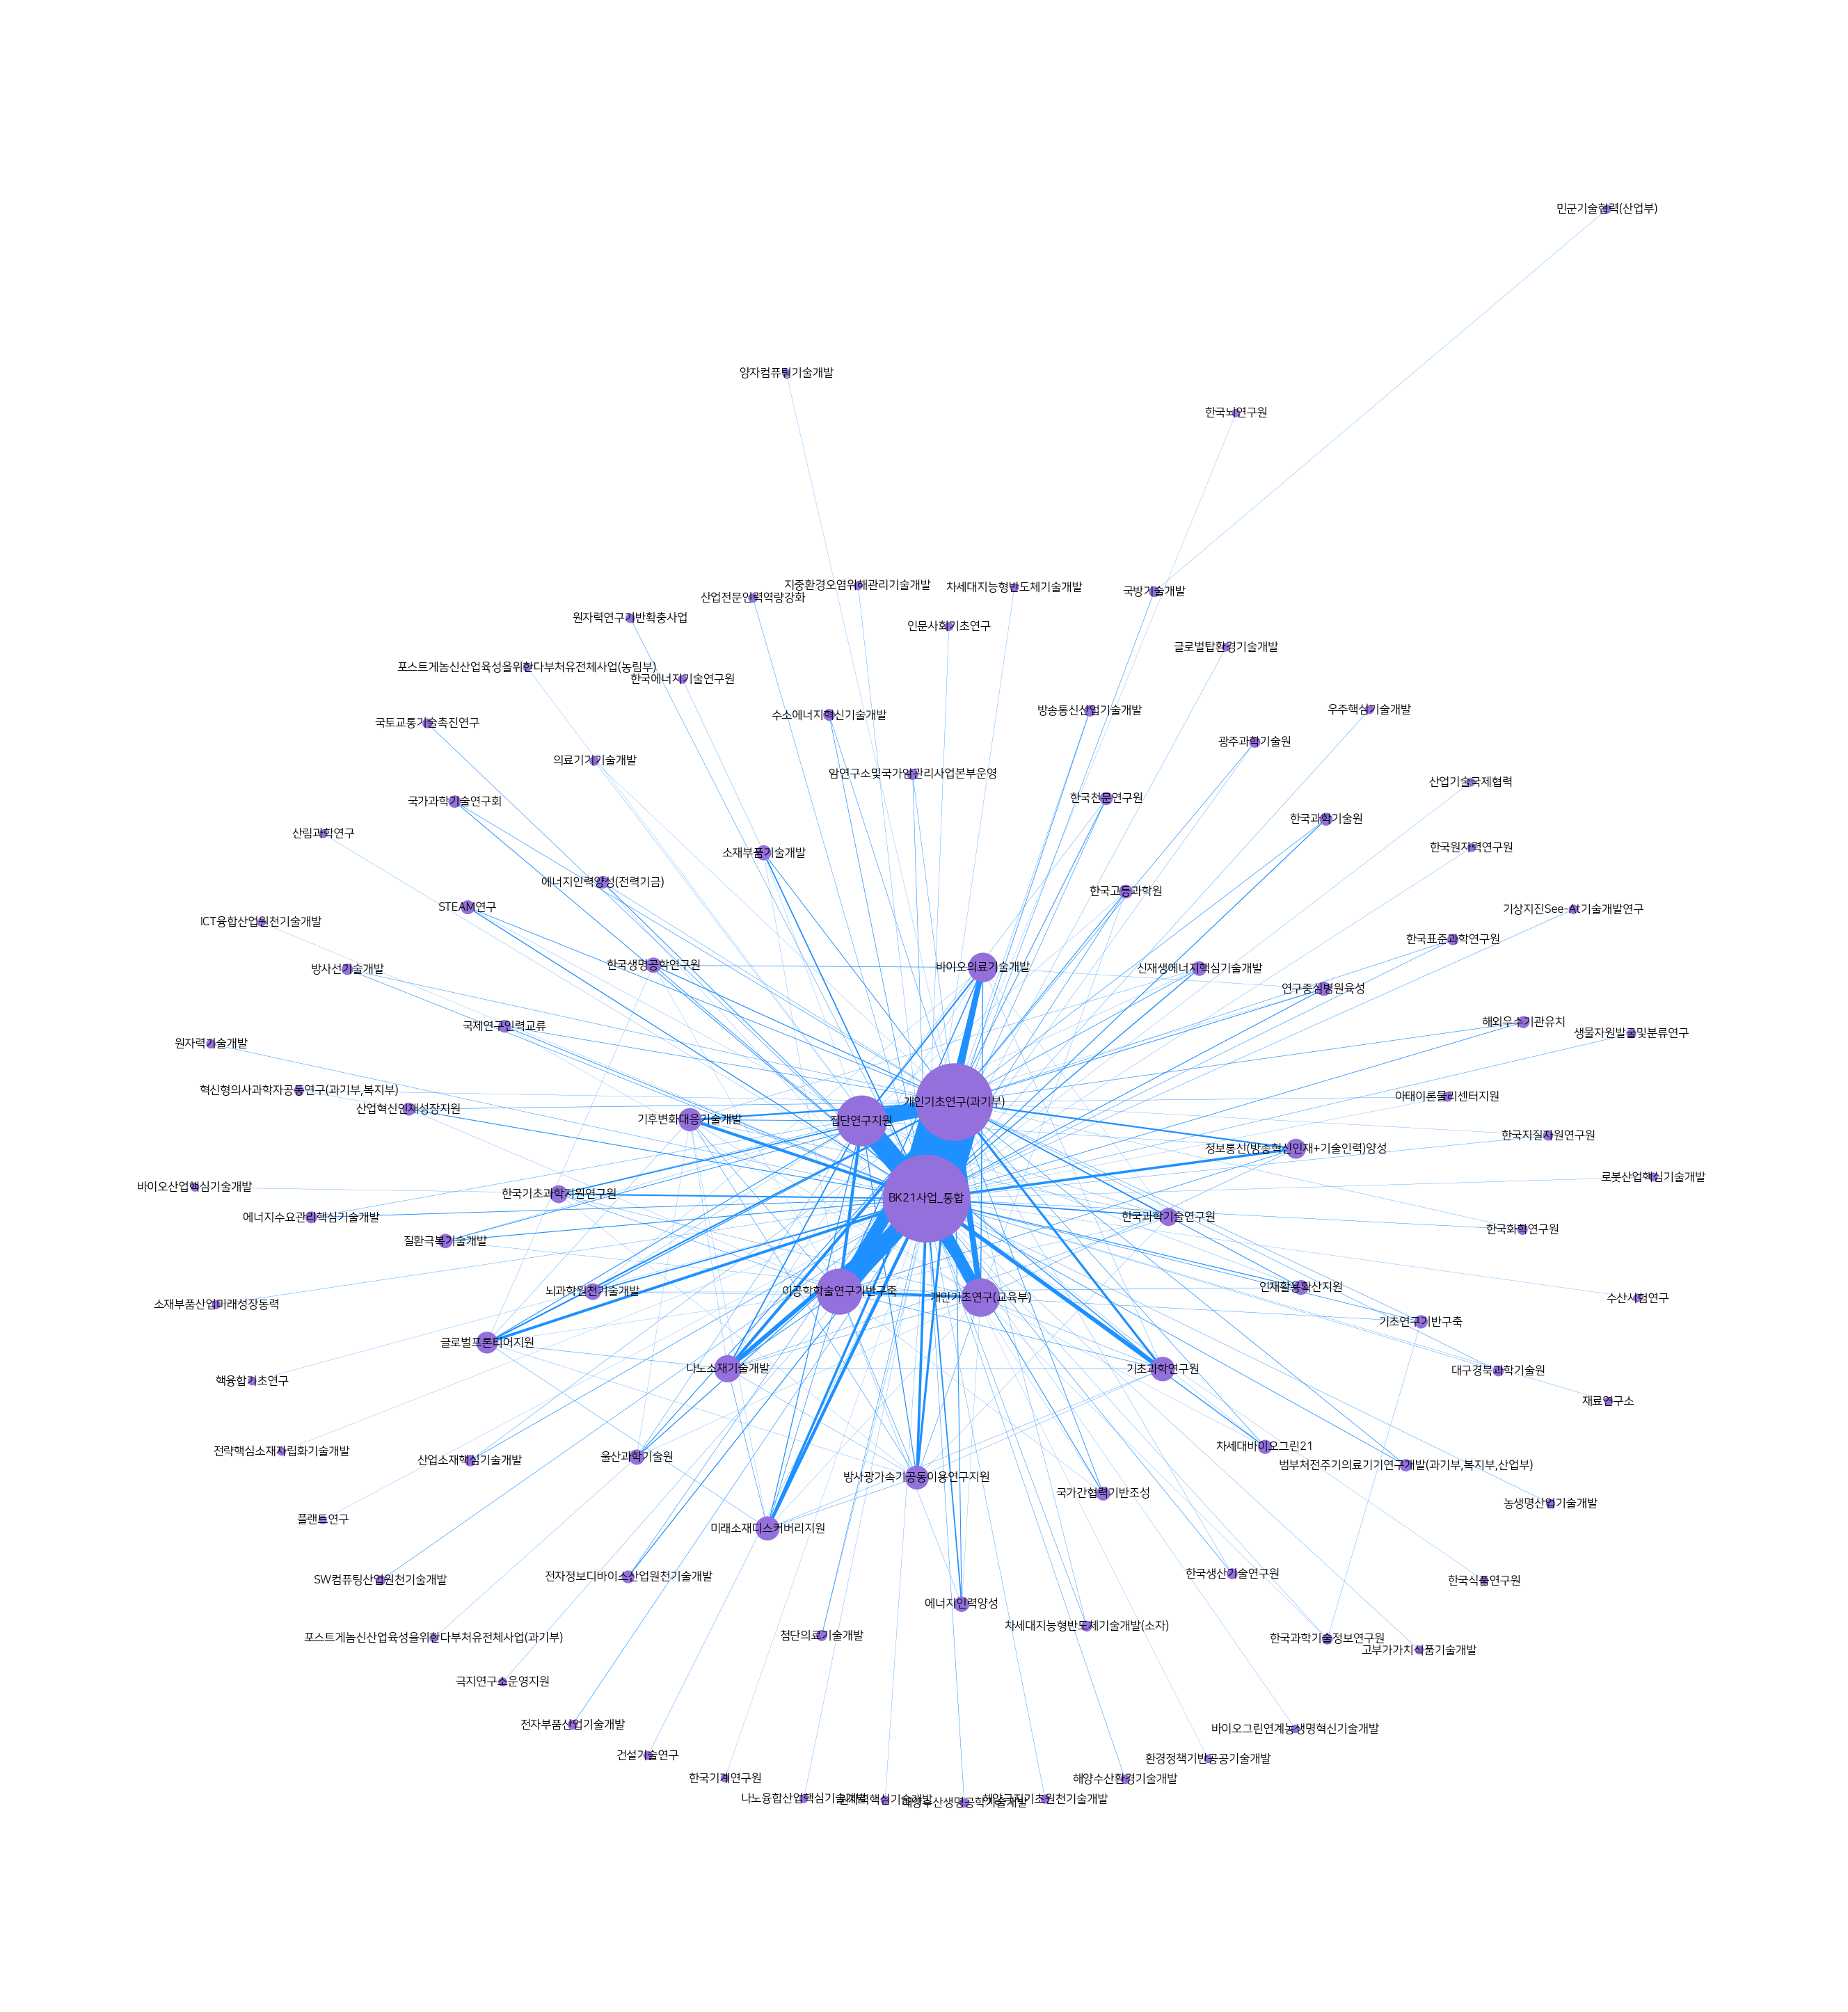

In [239]:
from networkx.drawing.nx_agraph import graphviz_layout


# Params
weight_threshold = 100
EDGE_SCALE = 10
NODE_SCALE = 200
DISTANCE_SCALE = .1


# 🔹 필터링된 네트워크 생성
G_filtered = draw_weight_filtered_network(A_proj, weight_threshold=weight_threshold)

# 🔥 Graphviz의 dot 레이아웃 적용
pos = graphviz_layout(G_filtered, prog="neato")

# 🔥 Edge 가중치를 반영한 두께 설정
if G_filtered.edges():
    weights = [d["weight"] for _, _, d in G_filtered.edges(data=True)]
    edge_widths = [w / max(weights) * EDGE_SCALE for w in weights]  # 정규화하여 엣지 두께 조정
else:
    edge_widths = []

# 🔥 Node Strength (연결된 엣지 가중치 합) 기반 크기 조절
strength_dict = {node: sum(weight for _, _, weight in G_filtered.edges(node, data="weight")) for node in G_filtered.nodes()}
max_strength = max(strength_dict.values()) if strength_dict else 1
node_sizes = [strength_dict[node] / max_strength * NODE_SCALE for node in G_filtered.nodes()]  # 정규화하여 크기 설정

# Position Adjust
pos_adj = adjust_positions(pos, node_sizes, min_factor=DISTANCE_SCALE, iterations=100, step_size=0.01)

# --- 시각화 ---
N_ROW = 1
N_COL = 2
X_SIZE = 6
Y_SIZE = 6
DPI = 600
plt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']

fig = plt.figure(figsize=(X_SIZE * N_COL, Y_SIZE * N_ROW), dpi=DPI, facecolor="none")
spec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)
axes = []

axi = 0
ax = fig.add_subplot(spec[axi // N_COL, axi % N_COL], facecolor="none")  # row, col
# ax.text(-.05, 1.02, '%s' % (string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')

# 🔹 네트워크 그래프 시각화 (Graphviz neato 레이아웃 사용)
nx.draw(G_filtered, pos_adj, with_labels=True, 
        node_color="mediumpurple", edge_color="dodgerblue",
        width=edge_widths, node_size=node_sizes, font_family='NanumSquare', font_size=2)


# plt.title(f"Projected Graph (Filtered: Edge Weight ≥ {weight_threshold})")
fig.patch.set_alpha(0)  # 배경 투명 설정
plt.show()

In [242]:
# Degree & Strength 계산
degree_dict = dict(G_filtered.degree())  # Degree 계산
strength_dict = {node: sum(weight for _, _, weight in G_filtered.edges(node, data="weight")) for node in G_filtered.nodes()}

# DataFrame 생성
df_stats = pd.DataFrame({
    "Node": list(degree_dict.keys()),
    "Degree": list(degree_dict.values()),
    "Strength": list(strength_dict.values())
})

# Degree, Strength 정렬 후 출력
df_stats = df_stats.sort_values(by=["Degree", "Strength"], ascending=False)
df_stats.iloc[:10]#[df_stats["Degree"] > 30]

,Node,Degree,Strength
59,BK21사업_통합,97,97869.0
3,개인기초연구(과기부),56,75110.0
44,집단연구지원,26,29544.0
1,개인기초연구(교육부),22,15670.0
87,이공학학술연구기반구축,21,23621.0
9,나노소재기술개발,12,6622.0
15,방사광가속기공동이용연구지원,12,4745.0
82,기후변화대응기술개발,12,4400.0
67,바이오의료기술개발,11,8191.0
20,미래소재디스커버리지원,10,4909.0


In [243]:
df_edge

,사업명_정제,uid,count
0,국가간협력기반조성,WOS:000790104600002,1
1,BK21사업_통합,WOS:000831384900001,1
3,개인기초연구(과기부),WOS:000481891300014,1
4,이공학학술연구기반구축,WOS:000873865400001,1
5,BK21사업_통합,WOS:000643953700001,1
...,...,...,...
369133,이공학학술연구기반구축,WOS:000820160500001,1
369134,바이오산업기술개발,WOS:000869407400004,1
369135,BK21사업_통합,WOS:000754825300001,1
369136,개인기초연구(과기부),WOS:000857961200001,1


In [465]:
df_co = df.select([pl.col("사업명_정제"), pl.col("uid")]).drop_nulls().to_pandas()
df_co['count'] = 1

# msk_tg_project = df_co["사업명_정제"].isin(tg_project)
# df_co = df_co[msk_tg_project]

# Step 3. uid별 전체 count (즉, 모든 사업에서의 등장 횟수)에서 1을 뺀 값이 total_co
total_co = df_co.groupby('uid')[['count']].sum() - 1
total_co.columns = ["total_co"]

# Step 1. (사업명_정제, uid)별로 count 합산
df_grouped = df_co.groupby(['사업명_정제', 'uid'])['count'].sum()

local = df_grouped[df_grouped == 1]
local = local.reset_index()
local = local[local['uid'].isin(total_co[total_co == 0].dropna().index.values)]
local.columns = ['사업명_정제', 'uid', "local"]
local = local.set_index(["사업명_정제", "uid"])

# Step 2. 각 (사업명_정제, uid)별 count에서 1을 빼고, unstack한 후 uid별로 합산하면 internal_co가 계산됨
internal_co = (df_grouped - 1).reset_index().fillna(0)
internal_co.columns = ['사업명_정제', 'uid', "internal_co"]

cnt = df_co.groupby('사업명_정제')['count'].sum()

df_collabo = pd.merge(internal_co, total_co, on='uid')
df_collabo['external_co'] = df_collabo["total_co"] - df_collabo["internal_co"]
df_collabo = df_collabo.set_index(["사업명_정제", "uid"])
df_collabo = pd.concat([df_collabo, local], axis=1).fillna(0)
df_collabo["local"] = df_collabo["local"].astype("int")
df_collabo_gr = df_collabo.groupby("사업명_정제")[["local", 'internal_co', 'external_co', 'total_co']].sum()
df_collabo_gr['N_paper'] = cnt

In [457]:
df_collabo_gr.sort_values("local")[::-1].iloc[:20]

,local,internal_co,external_co,total_co
사업명_정제,,,,
BK21사업_통합,25899,12758,119249,132007
개인기초연구(과기부),20123,7983,93389,101372
개인기초연구(교육부),6911,889,21338,22227
이공학학술연구기반구축,4479,1803,32384,34187
집단연구지원,2573,448,39384,39832
기초과학연구원연구운영비지원,1722,71,7732,7803
바이오의료기술개발,1058,762,11957,12719
암연구소및국가암관리사업본부운영,867,16,815,831
한국고등과학원연구운영비지원,814,5,1522,1527


In [448]:
on = "uid"
target = "excellence_10"
# tatget = "count"
df_co = df.select([pl.col("사업명_정제"), pl.col(on), pl.col(target)]).drop_nulls().to_pandas()
# df_co['count'] = 1
df_co[target] = (df_co[target] > 0).astype(int)
df_co = df_co[df_co[target] > 0]

# msk_tg_project = df_co["사업명_정제"].isin(tg_project)
# df_co = df_co[msk_tg_project]

# Step 3. uid별 전체 count (즉, 모든 사업에서의 등장 횟수)에서 1을 뺀 값이 total_co
total_co = df_co.groupby(on)[[target]].sum() - 1
total_co.columns = ["total_co"]

# Step 1. (사업명_정제, uid)별로 count 합산
df_grouped = df_co.groupby(['사업명_정제', on])[target].sum()

local = df_grouped[df_grouped == 1]
local = local.reset_index()
local = local[local[tg].isin(total_co[total_co == 0].dropna().index.values)]
local.columns = ['사업명_정제', on, "local"]
local = local.set_index(["사업명_정제", on])

# Step 2. 각 (사업명_정제, uid)별 count에서 1을 빼고, unstack한 후 uid별로 합산하면 internal_co가 계산됨
internal_co = (df_grouped - 1).reset_index().fillna(0)
internal_co.columns = ['사업명_정제', on, "internal_co"]



df_collabo = pd.merge(internal_co, total_co, on=on)
df_collabo['external_co'] = df_collabo["total_co"] - df_collabo["internal_co"]
df_collabo = df_collabo.set_index(["사업명_정제", on])
df_collabo = pd.concat([df_collabo, local], axis=1).fillna(0)
df_collabo["local"] = df_collabo["local"].astype(int)
df_collabo_gr = df_collabo.groupby("사업명_정제")[["local", 'internal_co', 'external_co', 'total_co']].sum()

In [464]:
df_co.groupby('사업명_정제')['count'].sum()

사업명_정제
(다부처)수열냉난방및재생열하이브리드시스템기술개발           4
(혁신도전형)플라즈마활용폐유기물고부가가치기초원료화기술개발      2
100세사회대응고령친화제품연구개발                  42
1세대스마트플랜트팜고도화및실증                     8
1세대스마트플랜트팜산업화기술개발                    4
                                  ... 
환자중심의료기술최적화연구                       65
환자중심의료기술최적화연구사업                     85
효율적인치안활동을위한현장지원기술개발                  7
효율적인치안활동을위한현장지원기술개발(경찰청)             2
휴먼플러스융합연구개발챌린지사업                   128
Name: count, Length: 1134, dtype: int64

In [473]:
df_collabo_gr

,local,internal_co,external_co,total_co,N_paper
사업명_정제,,,,,
(다부처)수열냉난방및재생열하이브리드시스템기술개발,2,0,2,2,4
(혁신도전형)플라즈마활용폐유기물고부가가치기초원료화기술개발,0,0,4,4,2
100세사회대응고령친화제품연구개발,26,2,17,19,42
1세대스마트플랜트팜고도화및실증,4,0,4,4,8
1세대스마트플랜트팜산업화기술개발,1,1,1,2,4
...,...,...,...,...,...
환자중심의료기술최적화연구,43,0,35,35,65
환자중심의료기술최적화연구사업,58,0,38,38,85
효율적인치안활동을위한현장지원기술개발,2,0,16,16,7


In [458]:
df_collabo_gr.sort_values("internal_co")[::-1].iloc[:10]

,local,internal_co,external_co,total_co
사업명_정제,,,,
BK21사업_통합,25899,12758,119249,132007
개인기초연구(과기부),20123,7983,93389,101372
이공학학술연구기반구축,4479,1803,32384,34187
개인기초연구(교육부),6911,889,21338,22227
바이오의료기술개발,1058,762,11957,12719
집단연구지원,2573,448,39384,39832
나노소재기술개발,391,329,9751,10080
기후변화대응기술개발,468,319,6056,6375
한국생명공학연구원연구운영비지원,249,236,2492,2728


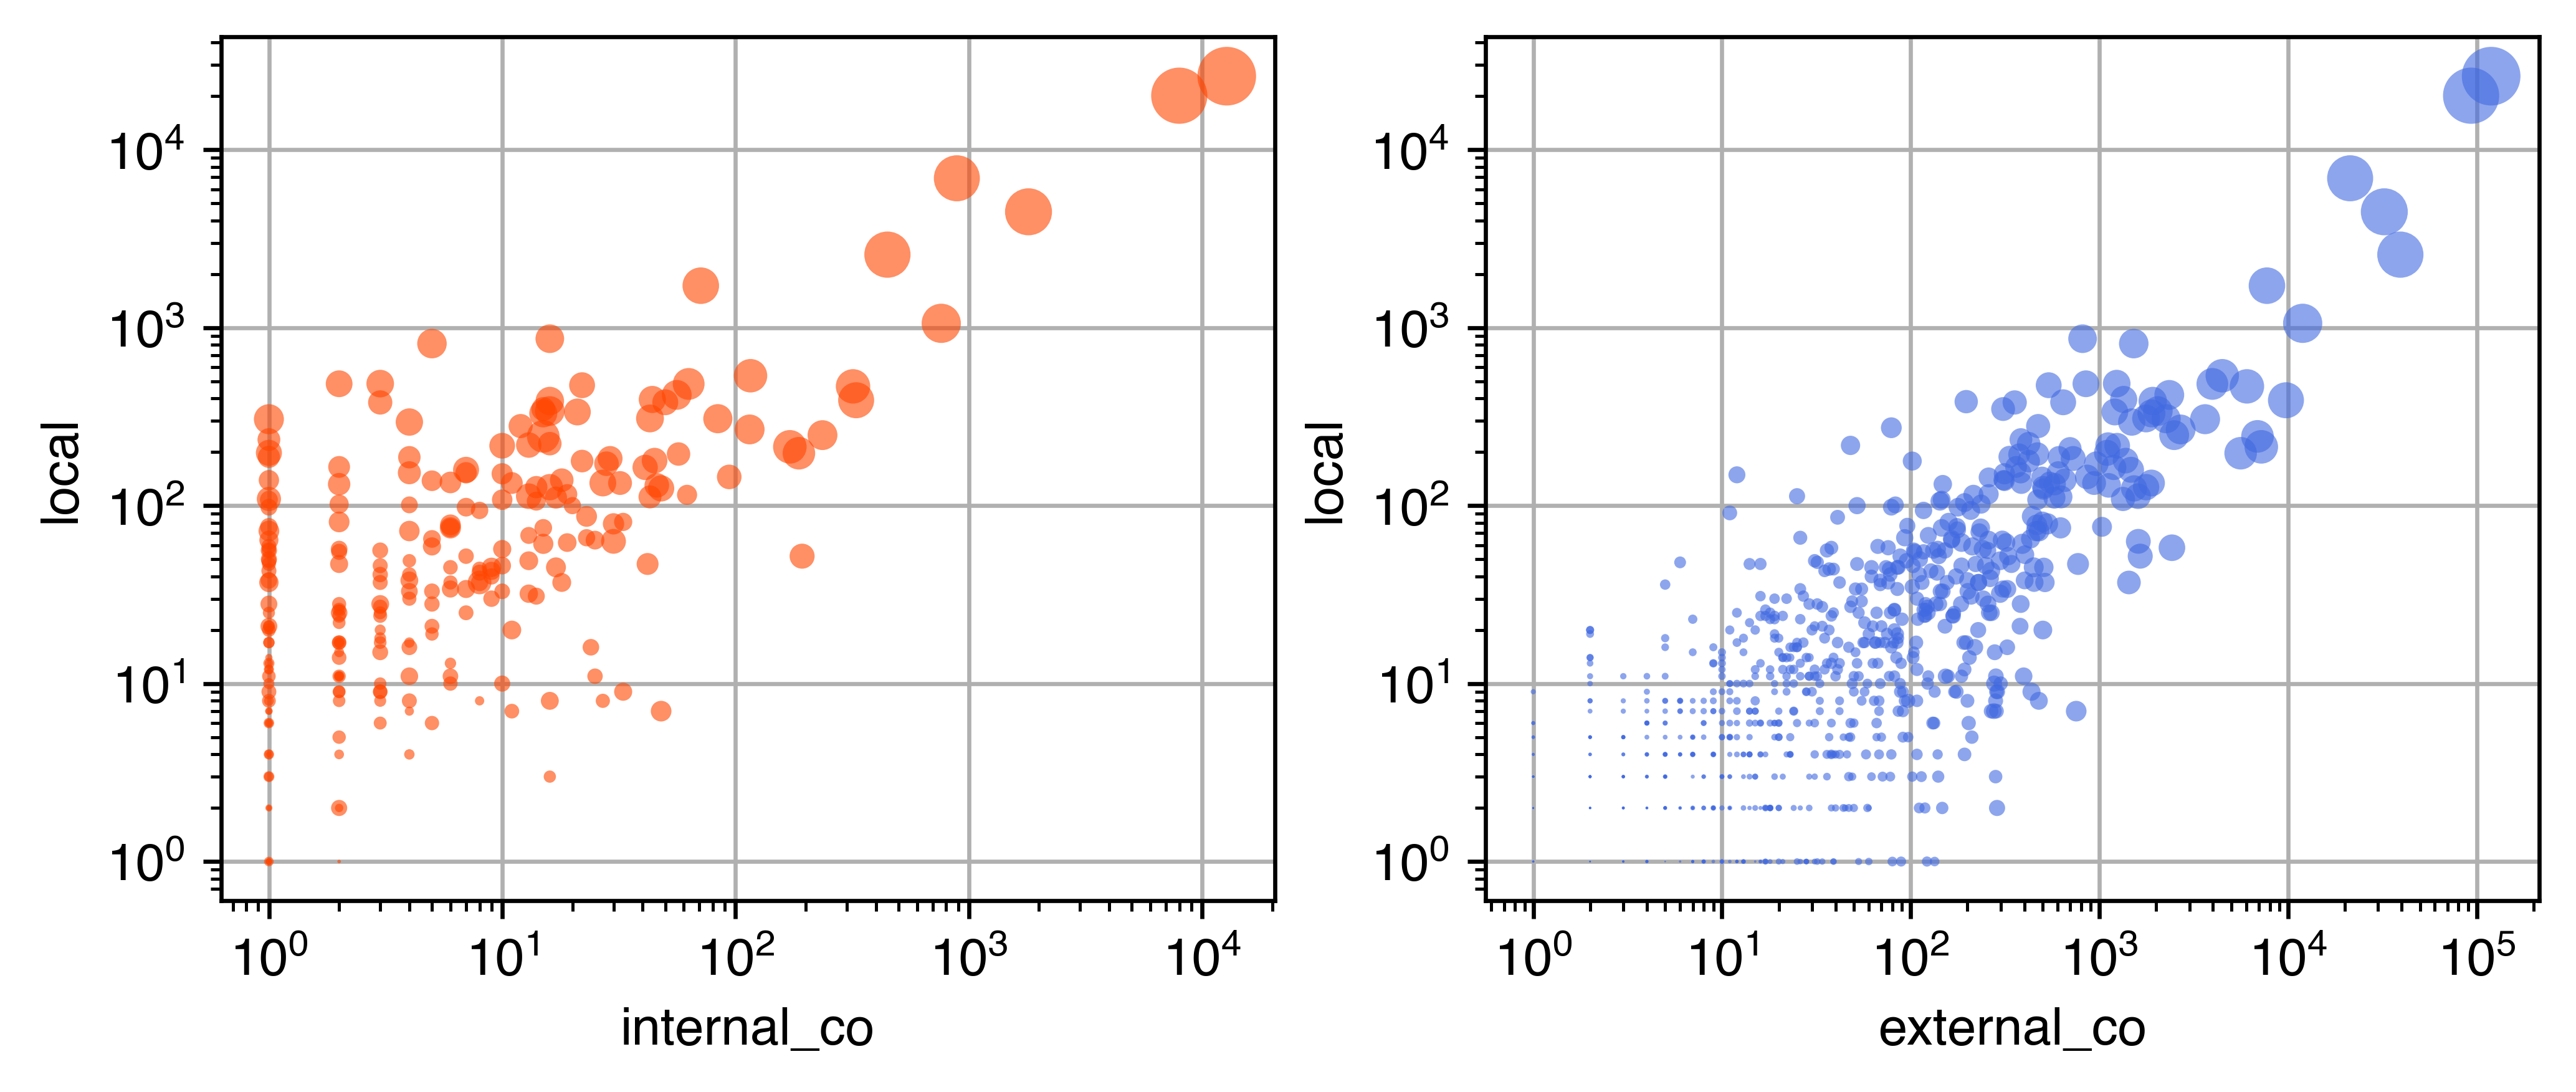

In [472]:
N_ROW = 1
N_COL = 2
X_SIZE = 4
Y_SIZE = 3
DPI = 600
plt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']

fig = plt.figure(figsize=(X_SIZE * N_COL, Y_SIZE * N_ROW), dpi=DPI, facecolor="none")
spec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)
axes = []

axi = 0
ax = fig.add_subplot(spec[axi // N_COL, axi % N_COL], facecolor="none")  # row, col

df_collabo_gr.plot(kind="scatter", x="internal_co", y="local", ax=ax, 
                   edgecolor="none", color="orangered", alpha=.6, zorder=2, s=np.log10(cnt)**3)
plt.xscale("log")
plt.yscale("log")
plt.grid()

axi = 1
ax = fig.add_subplot(spec[axi // N_COL, axi % N_COL], facecolor="none")  # row, col

df_collabo_gr.plot(kind="scatter", x="external_co", y="local", ax=ax, 
                   edgecolor="none", color="royalblue", alpha=.6, zorder=2, s=np.log10(cnt)**3)
plt.xscale("log")
plt.yscale("log")
plt.grid()

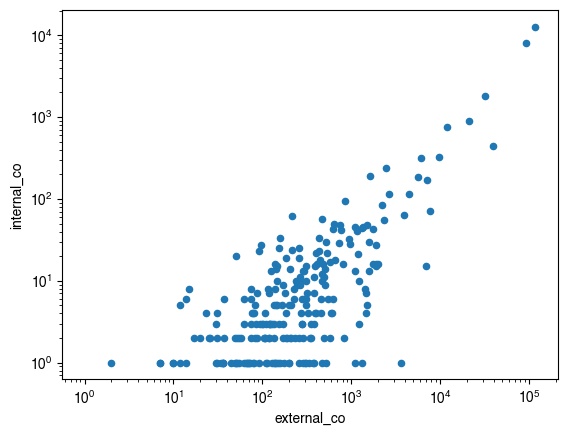

In [421]:
df_collabo_gr.plot(kind="scatter", x="external_co", y="internal_co")
plt.xscale("log")
plt.yscale("log")

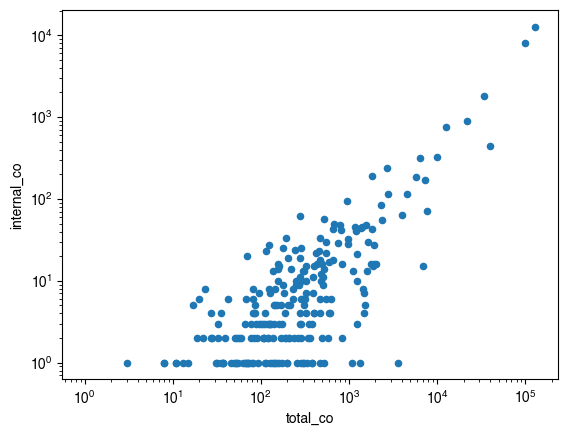

In [425]:
df_collabo_gr.plot(kind="scatter", x="total_co", y="internal_co")
plt.xscale("log")
plt.yscale("log")

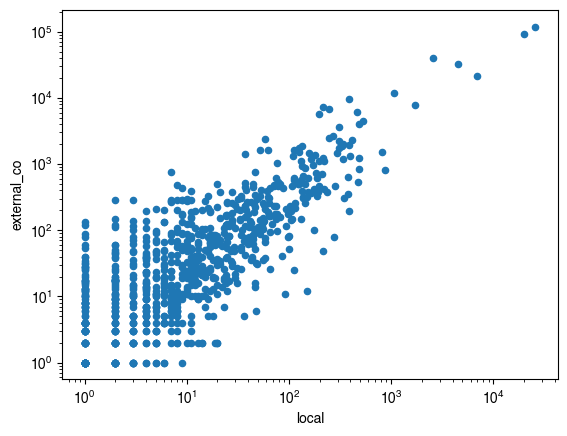

In [456]:
df_collabo_gr.plot(kind="scatter", x="local", y="external_co")
plt.xscale("log")
plt.yscale("log")

In [415]:
x = (df_collabo_gr['local'] / df_collabo_gr['external_co'])
x[x > 0].sort_values().iloc[:50]

사업명_정제
미래소재디스커버리지원                    0.000139
기후변화대응기술개발                     0.000166
바이오의료기술개발                      0.000168
나노소재기술개발                       0.000206
집단연구지원                         0.000331
글로벌프론티어지원                      0.000357
뇌과학원천기술개발                      0.000371
울산과학기술원                        0.000414
연구중심병원육성                       0.000522
STEAM연구                        0.000530
한국기초과학지원연구원                    0.000552
한국과학기술원                        0.000625
전자정보디바이스산업원천기술개발               0.000656
차세대바이오그린21                     0.000675
한국생명공학연구원                      0.000805
방사선기술개발                        0.000850
이공학학술연구기반구축                    0.001087
인재활용확산지원                       0.001136
암연구소및국가암관리사업본부운영               0.001230
개인기초연구(과기부)                    0.001248
한국과학기술연구원                      0.001267
방송통신산업기술개발                     0.001379
수소에너지혁신기술개발                    0.001401
개인기초연구(교육부)                    0.001458
범부처전주기의료기기연구개발(과기부,복지부,산업부)    0.

In [406]:
df_collabo.sort_values("internal_co")[::-1]

internal_co  total_co  \
사업명_정제                     uid                                          
BK21사업_통합                  WOS:000439737700002            6        11   
                           WOS:000485478200004            6        12   
개인기초연구(과기부)                WOS:000695585400070            5         6   
기초연구기반구축                   WOS:000693943300004            5        10   
개인기초연구(교육부)                WOS:000456640000014            5         6   
...                                                     ...       ...   
바이오의료기술개발                  WOS:000471605500005            0         2   
                           WOS:000471590700001            0         3   
                           WOS:000471465800001            0         1   
                           WOS:000471361000019            0         4   
(다부처)수열냉난방및재생열하이브리드시스템기술개발 WOS:000805668100005            0         0   

                                                external_co  local  
사업명_정제                     uid                                      
BK21사업_통합                  WOS:000439737700002            5      0  
                           WOS:000485478200004            6      0  
개인기초연구(과기부)                WOS:000695585400070            1      0  
기초연구기반구축                   WOS:000693943300004            5      0  
개인기초연구(교육부)                WOS:000456640000014            1      0  
...                                                     ...    ...  
바이오의료기술개발                  WOS:000471605500005            2      0  
                           WOS:000471590700001            3      0  
                           WOS:000471465800001            1      0  
                           WOS:000471361000019            4      0  
(다부처)수열냉난방및재생열하이브리드시스템기술개발 WOS:000805668100005            0      1  

[245062 rows x 4 columns]

In [343]:
df_edge[df_edge["사업명_정제"] == "BK21사업_통합"]['count'].sum()

81749

In [411]:
local

local
사업명_정제                     uid                       
(다부처)수열냉난방및재생열하이브리드시스템기술개발 WOS:000805668100005      1
BK21사업_통합                  WOS:000416741800031      1
                           WOS:000424407200262      1
                           WOS:000424700800012      1
                           WOS:000424814300038      1
...                                               ...
해양수산환경기술개발                 WOS:000633713900001      1
해양안전및해양교통시설기술개발            WOS:000487807800004      1
                           WOS:000587856200001      1
화학사고대응환경기술개발               WOS:000436202500009      1
환경정책기반공공기술개발               WOS:000518145400001      1

[989 rows x 1 columns]

In [401]:
df_edge[df_edge['uid'] == "WOS:000471465800001"]

,사업명_정제,uid,count
2318,바이오의료기술개발,WOS:000471465800001,1
101137,산림생물종연구,WOS:000471465800001,1


In [396]:
(df_grouped - 1).unstack(level=0).loc["WOS:000643953700001"].dropna()

사업명_정제
BK21사업_통합      2.0
개인기초연구(교육부)    0.0
바이오의료기술개발      1.0
집단연구지원         0.0
Name: WOS:000643953700001, dtype: float64

In [397]:
df_collabo.reset_index()[df_collabo.reset_index()["uid"] == "WOS:000643953700001"]

,사업명_정제,uid,internal_co,total_co,external_co,local
43988,BK21사업_통합,WOS:000643953700001,2,6,4,0
131081,개인기초연구(교육부),WOS:000643953700001,0,6,6,0
163687,바이오의료기술개발,WOS:000643953700001,1,6,5,0
220456,집단연구지원,WOS:000643953700001,0,6,6,0


In [477]:
res_tot

excellence_1                                    \
과제유형                        자유공모형                                     
사업명_정제 (다부처)수열냉난방및재생열하이브리드시스템기술개발 (비총액)국립수산과학원기본경비 (초)소형위성체계개발(해경청)   
과제수행연도                                                                
2018                          NaN              NaN              NaN   
2019                          NaN              NaN              NaN   
2020                          NaN              NaN              NaN   
2021                          NaN              NaN              NaN   
2022                          NaN              NaN              NaN   

                                                                            \
과제유형                                                                         
사업명_정제 (총액)국립수산과학원공익요원경비 (총액)국립수산과학원기본경비 (총액)국립수산과학원인건비 (총액)농림축산검역본부공익요원경비   
과제수행연도                                                                       
2018                 NaN             NaN            NaN                NaN   
2019                 NaN             NaN            NaN                NaN   
2020                 NaN             NaN            NaN                NaN   
2021                 NaN             NaN            NaN                NaN   
2022                 NaN             NaN            NaN                NaN   

                                                                ...  \
과제유형                                                            ...   
사업명_정제 (총액)농림축산검역본부기본경비 (총액)농림축산검역본부인건비 (혁신도전)상시재난감시용성층권드론기술개발  ...   
과제수행연도                                                          ...   
2018                NaN             NaN                    NaN  ...   
2019                NaN             NaN                    NaN  ...   
2020                NaN             NaN                    NaN  ...   
2021                NaN             NaN                    NaN  ...   
2022                NaN             NaN                    NaN  ...   

               총 참여연구원                                                     \
과제유형               하향식                                                      
사업명_정제 환경성질환예방관리핵심기술개발 환경시설재난재해대응기술개발 환경정책기반공공기술개발 환경정책연구개발 환자중심의료기술최적화연구   
과제수행연도                                                                      
2018               NaN            NaN         17.0      0.0           NaN   
2019               NaN            7.0         28.0      0.0           NaN   
2020               NaN            9.0         22.0      0.0           NaN   
2021              10.0            5.0          NaN      NaN           NaN   
2022               NaN            NaN          NaN      NaN        1033.0   

                                                                     \
과제유형                                                                  
사업명_정제 환자중심의료기술최적화연구사업 효율적인치안활동을위한현장지원기술개발 효율적인치안활동을위한현장지원기술개발(경찰청)   
과제수행연도                                                                
2018               NaN                 NaN                      NaN   
2019              13.0                 NaN                      NaN   
2020            1198.0                 NaN                     34.0   
2021             599.0                 NaN                      5.0   
2022               NaN                43.0                      NaN   

                                        
과제유형                                    
사업명_정제 휴대전화부정이용방지기술개발 휴먼플러스융합연구개발챌린지사업  
과제수행연도                                  
2018              NaN              NaN  
2019              NaN             73.0  
2020              NaN              NaN  
2021              NaN              NaN  
2022              NaN              NaN  

[5 rows x 28020 columns]